In [2]:
import spacy
import pandas as pd
import numpy as np

In [3]:
nlp = spacy.load("en_core_web_lg")

In [4]:
df = pd.read_json('news_dataset.json')

In [5]:
df.shape

(7500, 2)

In [6]:
df.head()

,text,category
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS
3,This Richard Sherman Interception Literally Sh...,SPORTS
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS


In [7]:
df.category.value_counts()

category
CRIME       2500
SPORTS      2500
BUSINESS    2500
Name: count, dtype: int64

In [8]:
df['label_num'] = df['category'].map({
    'CRIME':0,
    'SPORTS':1,
    'BUSINESS':2
})

In [9]:
df.head()

,text,category,label_num
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1
3,This Richard Sherman Interception Literally Sh...,SPORTS,1
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2


In [10]:
def preprocessing(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if(token.is_stop or token.is_space or token.is_punct):
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)
            

In [11]:
df['preprocessed_txt'] = df.text.apply(preprocessing)

In [12]:
df.head()

,text,category,label_num,preprocessed_txt
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall horse
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,vegas taxpayer spend Record $ 750 million New ...
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz


In [13]:
df['vector'] = df['text'].apply(lambda text : nlp(text).vector)

In [14]:
df.head()

,text,category,label_num,preprocessed_txt,vector
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame victim say victimize newly ...,"[-0.62528795, 0.30613044, -1.1252857, -1.52891..."
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer die fall horse,"[0.07858125, -1.8231387, 0.43582, -0.15502499,..."
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,vegas taxpayer spend Record $ 750 million New ...,"[-2.1691844, 1.8227255, -2.8935153, 0.37569532..."
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...,"[-1.1437662, -1.0418652, 0.021148713, -0.85042..."
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill Weed Legalization Buzz,"[0.12745197, 0.47146398, -1.4749851, -0.184787..."


In [15]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df.vector.values,df.label_num, test_size=0.20, random_state=2022,stratify=df.label_num)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [26]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [28]:
scaled_X_train = scaler.fit_transform(X_train_2d)
scaled_X_test = scaler.transform(X_test_2d)

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt_model = DecisionTreeClassifier()

dt_model.fit(scaled_X_train,y_train)

y_pred = dt_model.predict(scaled_X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       486
           1       0.58      0.64      0.61       479
           2       0.68      0.64      0.66       535

    accuracy                           0.63      1500
   macro avg       0.64      0.63      0.63      1500
weighted avg       0.64      0.63      0.63      1500



In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

NB_model = MultinomialNB()

NB_model.fit(scaled_X_train,y_train)

y_pred = NB_model.predict(scaled_X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       486
           1       0.70      0.66      0.68       479
           2       0.70      0.70      0.70       535

    accuracy                           0.69      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.69      0.69      0.69      1500



In [31]:
from  sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

knn_model.fit(scaled_X_train,y_train)

y_pred = knn_model.predict(scaled_X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       486
           1       0.75      0.74      0.74       479
           2       0.87      0.73      0.79       535

    accuracy                           0.77      1500
   macro avg       0.78      0.77      0.77      1500
weighted avg       0.78      0.77      0.77      1500



In [32]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier()

GB_model.fit(scaled_X_train,y_train)

y_pred = GB_model.predict(scaled_X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       486
           1       0.86      0.87      0.86       479
           2       0.87      0.87      0.87       535

    accuracy                           0.87      1500
   macro avg       0.87      0.87      0.87      1500
weighted avg       0.87      0.87      0.87      1500



Text(95.72222222222221, 0.5, 'Truth')

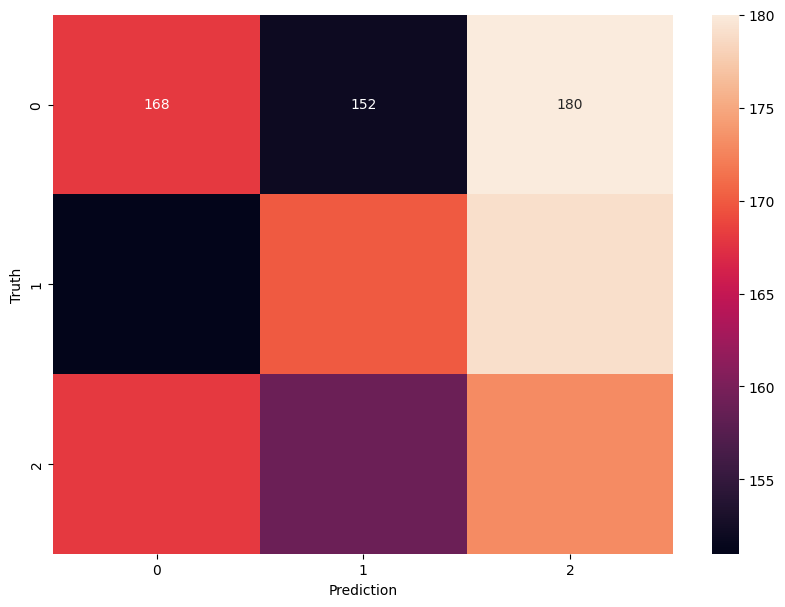

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')